# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Задачи:**
1. Загрузите и подготовьте данные.
2. Исследуйте баланс классов.
3. Обучите модель без учёта дисбаланса.
4. Улучшите качество модели, учитывая дисбаланс классов.
5. Обучите разные модели и найдите модель с предельно большим значением *F1*-меры. 
8. Измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.
6. Проведите финальное тестирование.
9. Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

**План:**
1. Откройте и изучите файл
    - Загрузка
    - Переработка
3. Исследовательский анализ данных
2. Модель без учёта дисбаланса
    - `train`, `valid`, `test`
    - С фамилией
    - Без фамилии
    - Подбор гиперпараметров
    - Тест, оценка
3. Модель с учётом дисбаланса и подбором гиперпараметров
    - На основе веса классов
    - На основе увеличения выборки
    - На основе уменьшения выборки
    - Выбор лучшей и выводы
4. Проверьте модель на тестовой выборке
    - Тест, оценка 
    - Сравнение результатов лучших моделей, до и после балансирования.
6. Оценка разницы моделей с учётом баланса и без
7. Общий вывод

**Содержание**<a id='toc0_'></a>    
1. [Откройте и изучите файл](#toc1_)    
1.1. [Загрузка](#toc1_1_)    
1.2. [Переработка](#toc1_2_)    
1.2.1. [Дубликаты](#toc1_2_1_)    
1.2.2. [Пропуски](#toc1_2_2_)    
1.2.3. [Типы данных](#toc1_2_3_)    
1.3. [Исследование задачи](#toc1_3_)    
1.3.1. [Категориальные](#toc1_3_1_)    
1.3.2. [Количественные](#toc1_3_2_)    
2. [Модель без учёта дисбаланса](#toc2_)    
2.1. [Прямое кодирование](#toc2_1_)    
2.2. [Выборки](#toc2_2_)    
2.3. [Масштабирование](#toc2_3_)    
2.4. [Модели с фамилией](#toc2_4_)    
2.5. [Модели без фамилии](#toc2_5_)    
2.6. [Подбор гиперпараметров модели](#toc2_6_)    
2.7. [Тест](#toc2_7_)    
3. [Борьба с дисбалансом](#toc3_)    
3.1. [ На основе веса классов](#toc3_1_)    
3.2. [На основе увеличения выборки](#toc3_2_)    
3.3. [На основе уменьшения выборки](#toc3_3_)    
3.4. [Выбор лучшей и выводы и выводы](#toc3_4_)    
4. [Тестирование модели](#toc4_)    
5. [Оценка разницы моделей с учётом баланса, и без](#toc5_)    
6. [Общий вывод](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
np.random.seed(12345)

In [3]:
RANDOM_STATE=12345

## 1. <a id='toc1_'></a>[Откройте и изучите файл](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Загрузка](#toc0_)

In [4]:
path_local = 'datasets/'
path_platform = '/datasets/'
path_extra = ''

df_list = [
    'Churn.csv'
]

if os.path.exists(path_local) and all(list(map(os.path.exists, map(lambda x: path_local + x, df_list)))):
    df_dir = path_local
    print("Файлы найдены.")
elif os.path.exists(path_platform) and all(list(map(os.path.exists, map(lambda x: path_platform + x, df_list)))):
    df_dir = path_platform
    print("Файлы найдены.")
elif os.path.exists(path_extra) and all(list(map(os.path.exists, map(lambda x: path_extra + x, df_list)))):
    df_dir = path_extra
    print("Файлы найдены.")
elif all(list(map(os.path.exists, df_list))):
    df_dir = ''
    print("Файлы найдены.")
else:
    print("Директория не найдена. Файлы не найдены в текущей.")  

data = pd.read_csv(os.path.join(df_dir, 'Churn.csv'))
data.columns = data.columns.str.lower()

Файлы найдены.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data.sample(15)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
7867,7868,15697201,Yocum,640,Spain,Female,46,3.0,0.00,1,1,1,156260.08,0
1402,1403,15613282,Vorobyova,757,France,Male,29,8.0,130306.49,1,1,0,77469.38,0
8606,8607,15694581,Rawlings,807,Spain,Male,42,5.0,0.00,2,1,1,74900.90,0
8885,8886,15815125,Michael,668,Spain,Male,45,4.0,102486.21,2,1,1,158379.25,0
6494,6495,15752846,Pinto,699,France,Male,28,7.0,0.00,2,1,1,22684.78,0
9628,9629,15596624,Topp,662,France,Female,22,9.0,0.00,2,1,1,44377.65,0
7459,7460,15583724,Raymond,645,Spain,Female,29,4.0,0.00,2,1,1,74346.11,0
3964,3965,15714981,Sabbatini,476,France,Male,37,4.0,0.00,1,1,1,55775.84,1
7000,7001,15739548,Johnson,775,France,Male,28,9.0,111167.70,1,1,0,149331.01,0
4470,4471,15593795,Linton,516,Germany,Female,53,NaN,156674.20,1,1,0,118502.34,1


In [7]:
data.drop(['rownumber', 'customerid'], axis=1, inplace=True)

In [8]:
data.sample(15)

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
2693,Alekseyeva,662,France,Male,34,2.0,0.00,2,0,1,21497.27,0
2575,Lucchese,551,Germany,Male,54,5.0,102994.04,1,1,0,176680.16,1
4901,Baxter,673,France,Male,59,0.0,178058.06,2,0,1,21063.71,1
1825,Tan,770,Germany,Male,45,4.0,110765.68,1,1,0,26163.74,1
4311,Korovina,727,Spain,Female,52,NaN,154733.97,1,1,0,80259.67,1
5701,Manna,625,Germany,Female,49,4.0,128504.76,1,1,0,126812.63,1
7566,Okwuoma,574,Spain,Male,36,4.0,77967.50,1,1,0,167066.95,1
5860,Carpenter,453,France,Female,37,4.0,131834.76,2,1,0,8949.20,0
5644,Mitchell,738,Spain,Female,37,8.0,100565.94,1,1,1,128799.86,0
9929,Artamonova,755,Germany,Male,38,4.0,111096.91,1,1,1,19762.88,0


**Выводы:**

Название колонок переведены в нижний регистр. Отбросили колонки со старым индексом и Id клиентов. Столбец продолжительности обслуживания имеет 9% пропусков. Необходимо обработать типы данных. Возможно имеет смысл округлить столбцы баланса и оценки зарплаты. Для применения МО потребуется преобразовать категориальные признаки фамилия и география по прямым кодированием.

Столбец фамилия может оказывать негативное влияние на работу модели. Проверим качество с ним и без него при построении модели.

### 1.2. <a id='toc1_2_'></a>[Переработка](#toc0_)

#### 1.2.1. <a id='toc1_2_1_'></a>[Дубликаты](#toc0_)

In [9]:
data.duplicated().sum()

0

In [10]:
for col in ['surname', 'geography']:
    print(data[col].str.lower().duplicated().sum()-data[col].duplicated().sum())
    

1
0


In [11]:
data[data['surname'].str.lower().duplicated() & ~data['surname'].duplicated()]

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
2798,Macdonald,579,Germany,Male,28,6.0,150329.15,1,1,0,145558.42,0


In [12]:
data.query('surname.str.lower() == "macdonald"')

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
126,MacDonald,549,France,Female,52,1.0,0.00,1,0,1,8636.05,1
1054,MacDonald,602,Spain,Female,22,7.0,141604.76,1,1,0,30379.60,0
1965,MacDonald,612,France,Female,33,NaN,0.00,1,0,0,142797.50,1
2178,MacDonald,774,Spain,Female,43,1.0,116360.07,1,1,0,17004.14,0
2798,Macdonald,579,Germany,Male,28,6.0,150329.15,1,1,0,145558.42,0
2805,MacDonald,688,France,Female,51,5.0,0.00,1,1,0,91624.11,1
2927,Macdonald,632,France,Male,32,NaN,111589.33,1,1,1,170382.99,0
3703,MacDonald,739,Germany,Male,40,5.0,149131.03,3,1,1,60036.99,1
3764,MacDonald,837,France,Male,49,8.0,103302.37,1,1,1,50974.57,0
3960,MacDonald,535,France,Male,47,NaN,160729.10,1,0,1,145986.35,0


In [13]:
data.surname.replace('Macdonald', 'MacDonald', inplace=True)

**Выводы:**
    
Явных дупликатов нет. Фамилия `MacDonald`, написана двумя способами. Стандартизировано написание.

#### 1.2.2. <a id='toc1_2_2_'></a>[Пропуски](#toc0_)

In [14]:
data.isna().sum()

surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [15]:
sorted(data.tenure.unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, nan]

In [16]:
data.tenure.value_counts(dropna=False).sort_index()

0.0     382
1.0     952
2.0     950
3.0     928
4.0     885
5.0     927
6.0     881
7.0     925
8.0     933
9.0     882
10.0    446
NaN     909
Name: tenure, dtype: int64

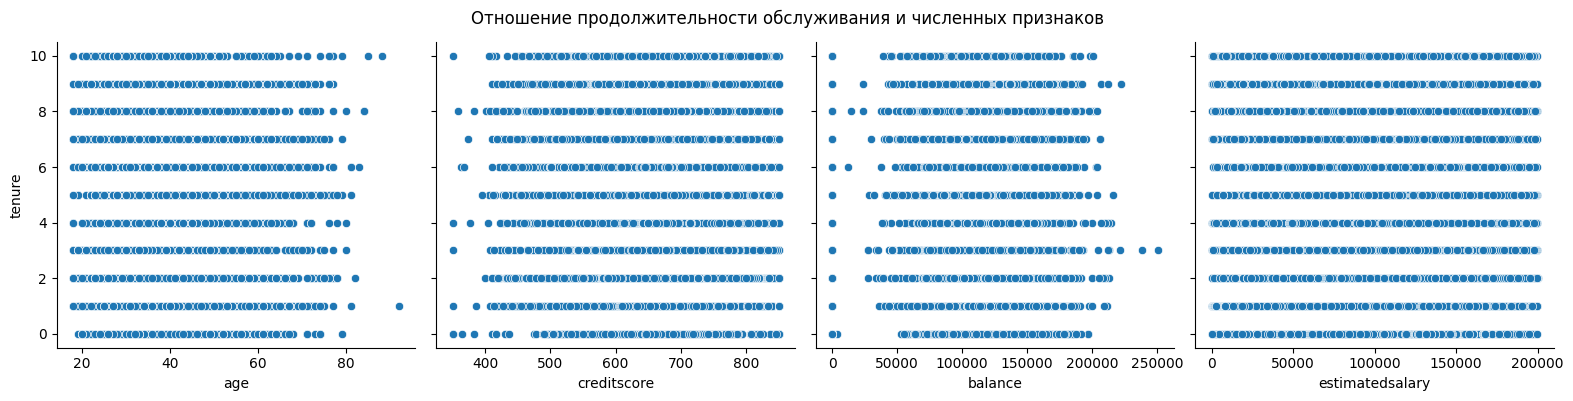

In [17]:
sns.pairplot(data, y_vars=['tenure'], x_vars=['age', 'creditscore', 'balance', 'estimatedsalary'], height=4)
plt.suptitle("Отношение продолжительности обслуживания и численных признаков");
plt.subplots_adjust(top=.9)

In [18]:
data.pivot_table(
    columns=['tenure'],
    values=['age', 'creditscore', 'balance', 'estimatedsalary'],
    aggfunc='median'
).T

,age,balance,creditscore,estimatedsalary
tenure,,,,
0.0,38.0,101050.445,653.0,102160.510
1.0,38.0,97842.705,652.0,101970.470
2.0,38.0,97364.045,655.0,97613.545
3.0,37.0,99739.770,652.0,94368.490
4.0,37.0,93059.340,651.0,101371.050
5.0,38.0,94754.000,654.0,100941.570
6.0,37.0,96166.880,648.0,98090.910
7.0,37.0,97459.060,650.0,104379.360
8.0,37.0,98649.550,651.0,99654.130


In [19]:
data.dropna(subset=['tenure'], inplace=True)

**Выводы:**

Пропуски в признаке "продолжительность обслуживания" не имеют явных связей с другими признаками, как следствие не подлежат восстановлению, отбросим.

#### 1.2.3. <a id='toc1_2_3_'></a>[Типы данных](#toc0_)

In [20]:
data.tenure = data.tenure.astype('Int32')

In [21]:
for col in ['balance', 'estimatedsalary']:
    data[col] = (data[col]/100).astype(int)

In [22]:
for col in ['hascrcard', 'isactivemember', 'exited']:
    print(data[col].value_counts())

1    6409
0    2682
Name: hascrcard, dtype: int64
1    4687
0    4404
Name: isactivemember, dtype: int64
0    7237
1    1854
Name: exited, dtype: int64


In [23]:
for col in ['hascrcard', 'isactivemember', 'exited']:
    data[col] = data[col].astype(bool)

In [24]:
data.dtypes

surname            object
creditscore         int64
geography          object
gender             object
age                 int64
tenure              Int32
balance             int32
numofproducts       int64
hascrcard            bool
isactivemember       bool
estimatedsalary     int32
exited               bool
dtype: object

In [25]:
data.sample(15)

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
9472,Murphy,775,Germany,Female,74,0,1613,1,True,True,1348,False
464,Ogbonnaya,818,Spain,Male,26,4,0,2,True,True,1670,False
4553,Barlow,581,France,Male,30,1,0,2,True,False,1994,False
7035,Sarratt,558,France,Female,56,7,1212,2,True,True,1162,False
3918,Ewing,850,France,Male,29,1,0,2,False,False,1529,False
581,McKay,607,Spain,Female,33,2,1084,2,False,True,1092,True
4427,Barese,771,France,Female,23,7,1561,1,True,False,729,False
1044,Timms,670,France,Female,38,4,1196,2,True,True,1104,False
416,Heath,487,Germany,Female,61,5,1103,1,False,False,113,True
3805,Rhodes,668,Spain,Male,34,0,0,1,False,False,999,False


**Выводы:**
Продожительность обслуживания теперь `int`. Баланс и оценка зарплаты округлены до сотен, теперь `int`. Наличие кредитки, активности и факт ухода, теперь `bool`. Прямое кодирование проведём после ИАД.

### 1.3. <a id='toc1_3_'></a>[Исследование задачи](#toc0_)

#### 1.3.1. <a id='toc1_3_1_'></a>[Категориальные](#toc0_)

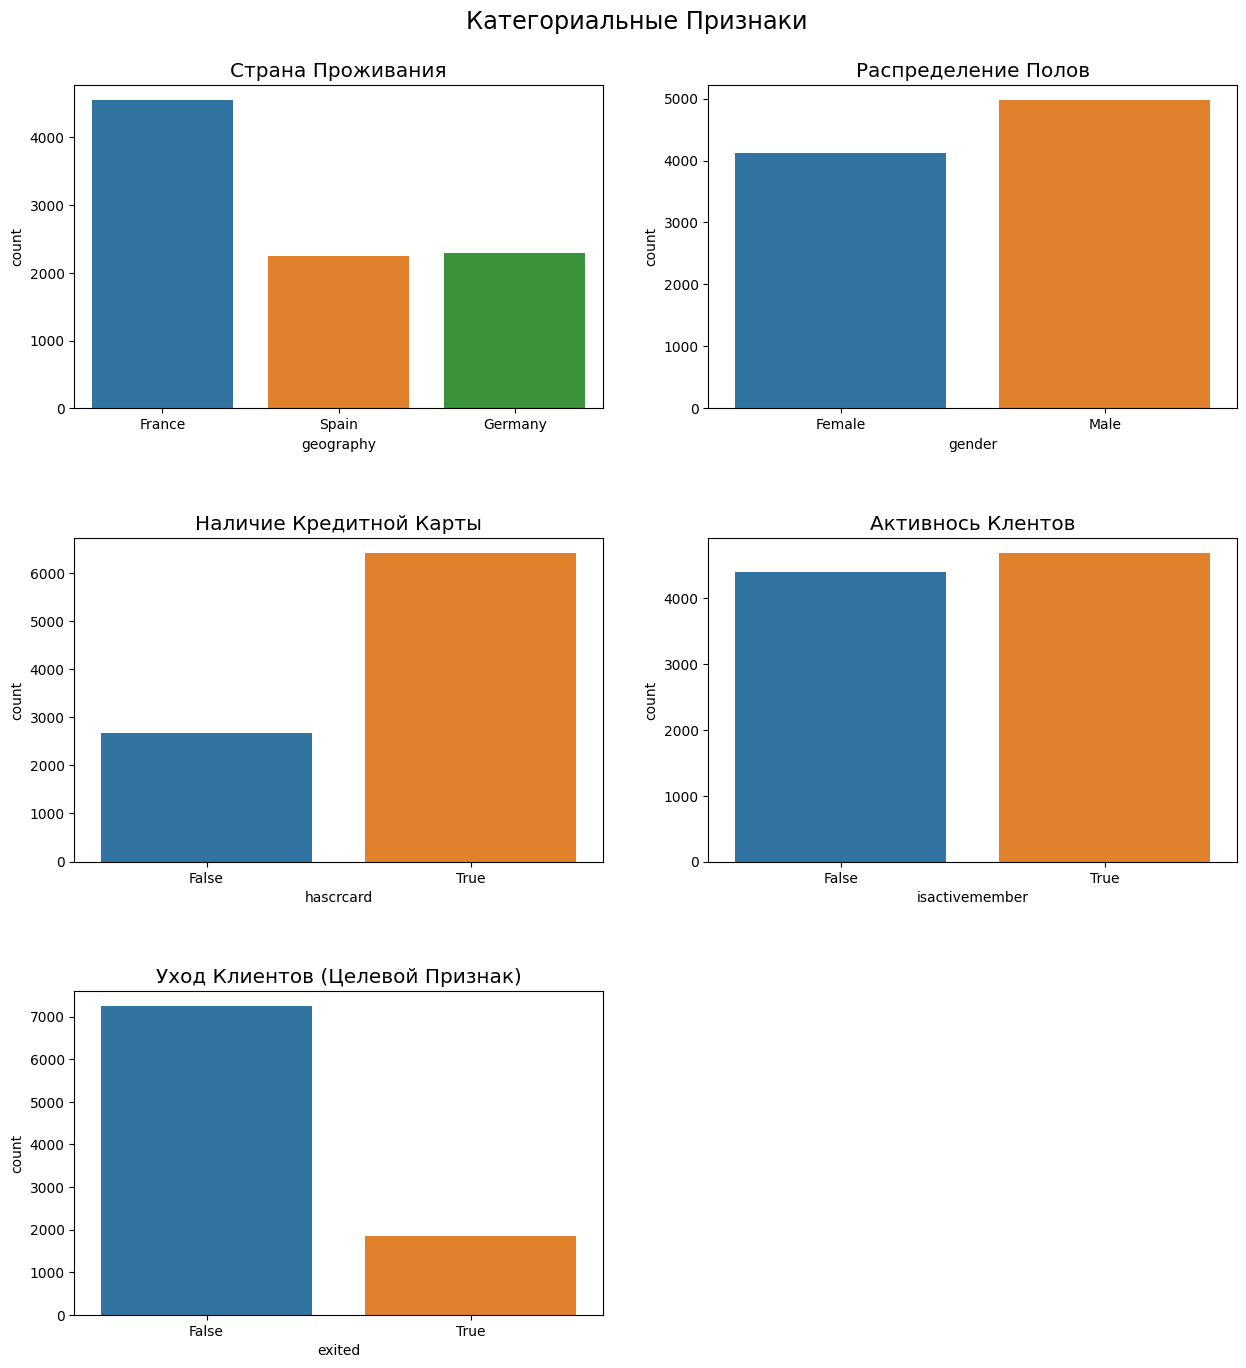

In [26]:
categ = ['geography', 'gender', 'hascrcard', 'isactivemember', 'exited']
categ_titles = ['Страна Проживания', "Распределение Полов", "Наличие Кредитной Карты",
                "Активнось Клентов", "Уход Клиентов (Целевой Признак)"]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
plt.suptitle("Категориальные Признаки", fontsize='xx-large')
plt.subplots_adjust(top=.93, hspace= .4)


for i in range(0,5):
    sns.countplot(x=data[categ[i]], ax=axs.flatten()[i]).set_title(categ_titles[i], fontsize='x-large')
    
fig.delaxes(axs[2, 1])


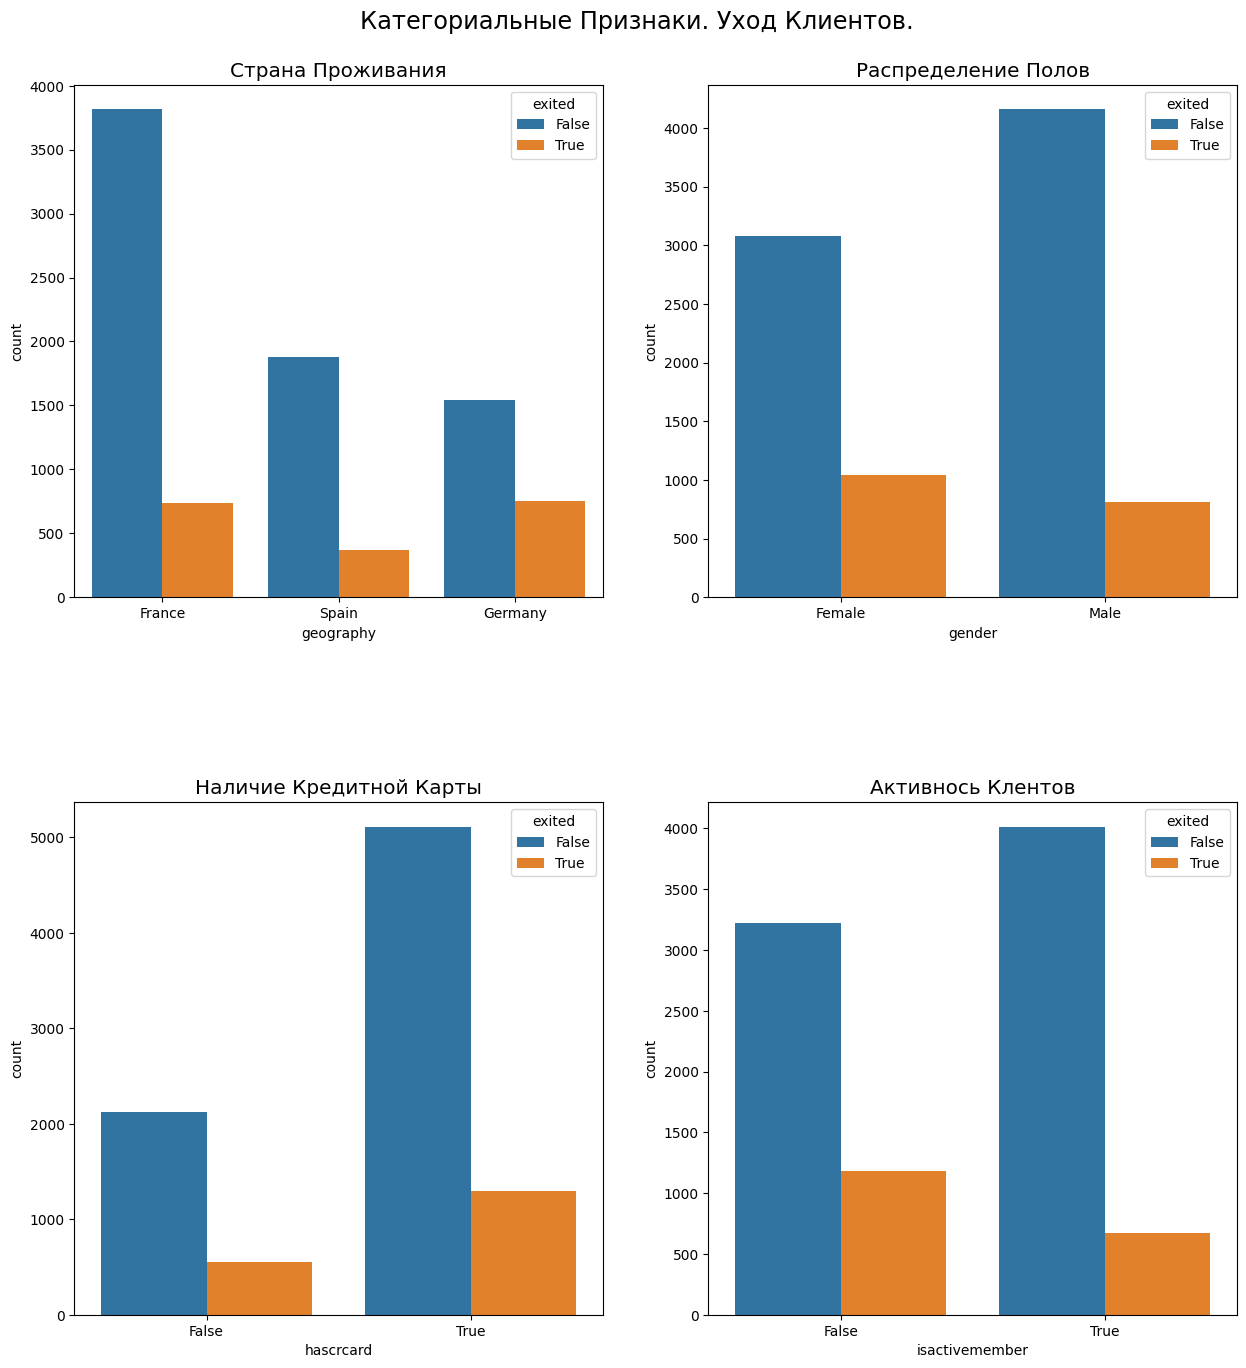

In [27]:
categ = ['geography', 'gender', 'hascrcard', 'isactivemember']
categ_titles = ['Страна Проживания', "Распределение Полов", "Наличие Кредитной Карты",
                "Активнось Клентов"]

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
plt.suptitle("Категориальные Признаки. Уход Клиентов.", fontsize='xx-large')
plt.subplots_adjust(top=.93, hspace= .4)


for i in range(0,4):
    sns.countplot(x=data[categ[i]], hue=data.exited, ax=axs.flatten()[i]).set_title(categ_titles[i], fontsize='x-large')
 


In [28]:
data.exited.value_counts(normalize=True)

False    0.796062
True     0.203938
Name: exited, dtype: float64

**Выводы:**

Целевой признак не сбалансирован, размер отрицательного класса приблизительно в четыре раза больше положительного.

Около половины клиентов из Франции, остальные разделены между Германией и Испанией поровну. У подовляющего большинства клиентов есть кредитная карта. В остальном данне распределены равномерно.

Клиенты из Германии, женщины, неактивные клиенты уходят с большей вероятностью.

#### 1.3.2. <a id='toc1_3_2_'></a>[Количественные](#toc0_)

In [29]:
data.dtypes

surname            object
creditscore         int64
geography          object
gender             object
age                 int64
tenure              Int32
balance             int32
numofproducts       int64
hascrcard            bool
isactivemember       bool
estimatedsalary     int32
exited               bool
dtype: object

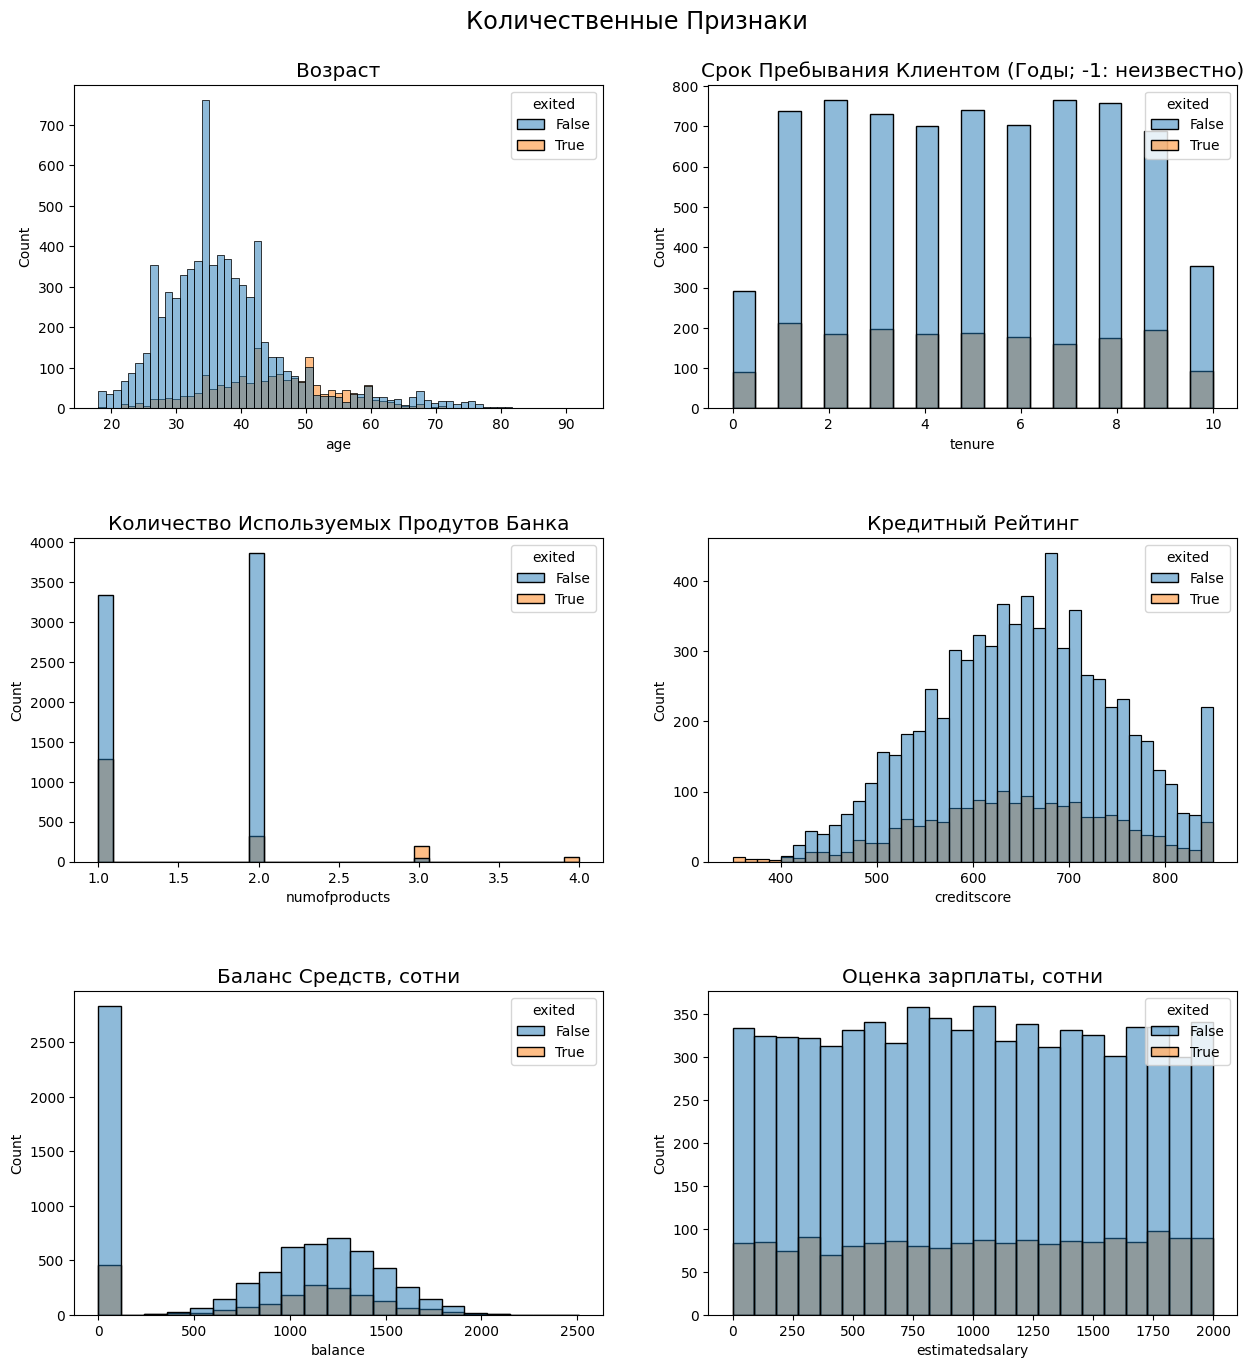

In [30]:
numer_titles = ['Возраст', "Срок Пребывания Клиентом (Годы; -1: неизвестно)", "Количество Используемых Продутов Банка",
                "Кредитный Рейтинг", "Баланс Средств, сотни", "Оценка зарплаты, сотни"]
numer = ['age', 'tenure', 'numofproducts', 'creditscore', 'balance', 'estimatedsalary']

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
plt.suptitle("Количественные Признаки", fontsize='xx-large')
plt.subplots_adjust(top=.93, hspace= .4)

for i in range(0,6):
    sns.histplot(data, x=numer[i], ax=axs.flatten()[i], hue='exited').set_title(numer_titles[i], fontsize='x-large')



**Выводы:**

Среди клиентов покидающих банк, больше людей среднего возраста. Практически все люди использующие 3 и 4 продукта покидают банк.

## 2. <a id='toc2_'></a>[Модель без учёта дисбаланса](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Прямое кодирование](#toc0_)

In [31]:
data_ohe = pd.get_dummies(data, columns=['gender'], drop_first=True)

In [32]:
data_ohe = pd.get_dummies(data)

### 2.2. <a id='toc2_2_'></a>[Выборки](#toc0_)

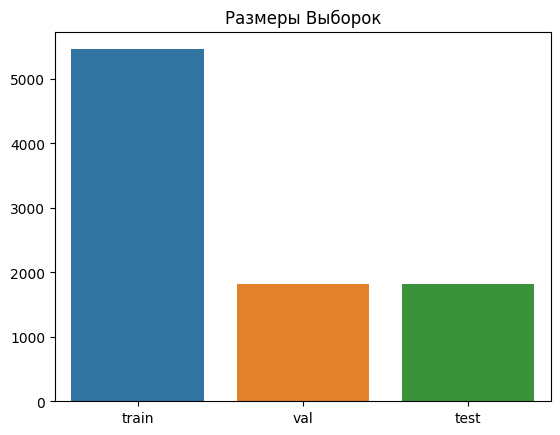

In [33]:
feat = data_ohe.drop('exited', axis=1)
targ = data_ohe.exited
feat_train, feat_test, targ_train, targ_test = train_test_split(feat, targ, test_size=.2, stratify=targ)
feat_train, feat_val, targ_train, targ_val = train_test_split(feat_train, targ_train, test_size=.25, stratify=targ_train)
feat_size = []
for features in feat_train, feat_val, feat_test:
    feat_size.append(len(features))
sns.barplot(x=['train', 'val', "test"], y=feat_size).set_title("Размеры Выборок");

### 2.3. <a id='toc2_3_'></a>[Масштабирование](#toc0_)

In [34]:
data.dtypes

surname            object
creditscore         int64
geography          object
gender             object
age                 int64
tenure              Int32
balance             int32
numofproducts       int64
hascrcard            bool
isactivemember       bool
estimatedsalary     int32
exited               bool
dtype: object

In [35]:
data.columns

Index(['surname', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited'],
      dtype='object')

In [36]:
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

In [37]:
pd.options.mode.chained_assignment = None

scaler=StandardScaler()
scaler.fit(feat_train[numeric])
feat_train[numeric] = scaler.transform(feat_train[numeric])
feat_val[numeric] = scaler.transform(feat_val[numeric])
feat_test[numeric] = scaler.transform(feat_test[numeric])

pd.options.mode.chained_assignment = 'warn'

**Выводы:**

Проведено прямое кодирование. Разбиты на выборки. Проверены размены. Проведено масштабирование.

### 2.4. <a id='toc2_4_'></a>[Модели с фамилией](#toc0_)

In [38]:
%%time

model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)
model.fit(feat_train, targ_train)
pred_val = model.predict(feat_val)
print("F1 val:", f1_score(targ_val, pred_val))
print("Acc val:", model.score(feat_val, targ_val)) 


F1 val: 0.29571984435797666
Acc val: 0.8008800880088008
CPU times: total: 484 ms
Wall time: 711 ms


In [39]:
%%time

model = RandomForestClassifier(random_state=RANDOM_STATE)
model.fit(feat_train, targ_train)
pred_val = model.predict(feat_val)
print("F1 val:", f1_score(targ_val, pred_val))
print("Acc val:", model.score(feat_val, targ_val)) 

F1 val: 0.4594059405940594
Acc val: 0.8498349834983498
CPU times: total: 5.34 s
Wall time: 8.87 s


**Выводы:**
 
 Для данного размера данных стандартные модели работают довольно долго. Сравним качество и скорость в следующем пункте.

### 2.5. <a id='toc2_5_'></a>[Модели без фамилии](#toc0_)

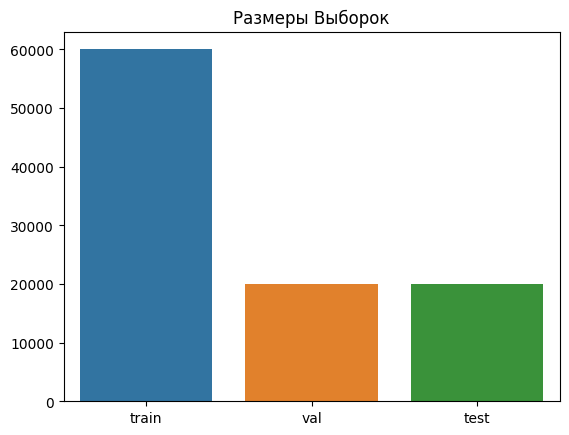

In [40]:
# no surname
data_ohe = pd.get_dummies(data.drop('surname', axis=1), columns=['gender'], drop_first=True)
data_ohe = pd.get_dummies(data.drop('surname', axis=1), drop_first=True)


feat = data_ohe.drop('exited', axis=1)
targ = data_ohe.exited
feat_train, feat_test, targ_train, targ_test = train_test_split(feat, targ, test_size=.2)
feat_train, feat_val, targ_train, targ_val = train_test_split(feat_train, targ_train, test_size=.25)
feat_size = []
for features in feat_train, feat_val, feat_test:
    feat_size.append(features.size)
sns.barplot(x=['train', 'val', "test"], y=feat_size).set_title("Размеры Выборок");

In [41]:
%%time

model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)
model.fit(feat_train, targ_train)
pred_val = model.predict(feat_val)
print("F1 val:", f1_score(targ_val, pred_val))
print("Acc val:", model.score(feat_val, targ_val)) 

F1 val: 0.32727272727272727
Acc val: 0.8168316831683168
CPU times: total: 93.8 ms
Wall time: 57.7 ms


In [42]:
%%time

model = RandomForestClassifier(random_state=RANDOM_STATE)
model.fit(feat_train, targ_train)
pred_val = model.predict(feat_val)
print("F1 val:", f1_score(targ_val, pred_val))
print("Acc val:", model.score(feat_val, targ_val)) 

F1 val: 0.5860927152317881
Acc val: 0.8624862486248625
CPU times: total: 750 ms
Wall time: 866 ms


**Выводы:**
 
Повторно создали выборки исключив столбец фамилия.

Скорость работы в разы улучшилась. Это делает подбор гиперпараметров значительно менее длительным.

Правильность оценки  незначительно (<2%) упала. Изменение F1 в пределах погрешности(5%), для логистической регресси упало, для леса возрасло. 

Главным показателем успеха модели, в рамках проекта, является F1. Лучшей моделью показывает себя лес. Таким образом имеет смысл исключить данные о фамилии из перечня оцениваемых моделью данных.

### 2.6. <a id='toc2_6_'></a>[Подбор гиперпараметров модели](#toc0_)

In [43]:
%%time

model = None
best_model = None

best_f1 = 0
for branches in range(1,26):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=20, max_depth=branches)
    model.fit(feat_train, targ_train)
    pred_val = model.predict(feat_val)
    f1 = f1_score(targ_val, pred_val)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = branches
        best_model = model
        acc_of_best = model.score(feat_val, targ_val)
    
print("Best F1 depth:", best_depth) 
print("F1 val:", best_f1)
print("Acc val:", acc_of_best) 
    

Best F1 depth: 13
F1 val: 0.6111111111111112
Acc val: 0.8690869086908691
CPU times: total: 2.89 s
Wall time: 3.48 s


In [44]:
for trees in range (10, 151, 10):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=trees, max_depth=best_depth)   
    model.fit(feat_train, targ_train)
    pred_val = model.predict(feat_val)
    f1 = f1_score(targ_val, pred_val)
    print("Trees:", trees, "F1 val:", f1)
    if f1 >= best_f1:        
        best_model = model
        best_f1 = f1
        best_trees = trees
        

print() 
print("unbalanced") 
print("Best F1 depth:", best_depth)     
print("Best F1 trees:", best_trees) 
print("F1 val:", best_f1)
acc_of_best = best_model.score(feat_val, targ_val)
print("Acc val:", acc_of_best) 
proba_one_val = best_model.predict_proba(feat_val)[:, 1]
print('ROC-AUC val:', roc_auc_score(targ_val, proba_one_val))

models_best_val = pd.DataFrame([ # Model Comparison
    [ 
    best_depth, best_trees,
    round(best_f1*100, 2), 
    round(acc_of_best*100, 2), 
    round(roc_auc_score(targ_val, proba_one_val)*100, 2)]
    ],
    columns=['depth', 'trees', 'F1, %', 'Acc, %', 'ROC-AUC, %'], index={"unbalanced"})
models_best_val.index.name = 'balance'        

Trees: 10 F1 val: 0.5770491803278689
Trees: 20 F1 val: 0.6111111111111112
Trees: 30 F1 val: 0.6138613861386139
Trees: 40 F1 val: 0.5953177257525084
Trees: 50 F1 val: 0.5866666666666667
Trees: 60 F1 val: 0.5868465430016864
Trees: 70 F1 val: 0.581081081081081
Trees: 80 F1 val: 0.5786802030456852
Trees: 90 F1 val: 0.5752961082910322
Trees: 100 F1 val: 0.5771812080536913
Trees: 110 F1 val: 0.5809682804674458
Trees: 120 F1 val: 0.5815126050420169
Trees: 130 F1 val: 0.5852842809364549
Trees: 140 F1 val: 0.5829145728643216
Trees: 150 F1 val: 0.5805369127516778

unbalanced
Best F1 depth: 13
Best F1 trees: 30
F1 val: 0.6138613861386139
Acc val: 0.8712871287128713
ROC-AUC val: 0.8709336978913349


**Выводы:**
 
Проведён подбор гиперпараметров. Лучшим образом, с точки зрения максимизации F1, себя показал лес из 30 деревьев с максимальной глубиной 13. Правильностсь 87.13%, F1 61.39%, ROC-AUC 87.09%.

### 2.7. <a id='toc2_7_'></a>[Тест](#toc0_)

In [45]:
best_unbalanced = best_model

In [46]:
%%time

best_acc = best_unbalanced.score(feat_test, targ_test)
print("Acc test:", best_acc)

pred_test = best_unbalanced.predict(feat_test)
best_f1 = f1_score(targ_test, pred_test)
print("F1 test:", best_f1)

proba_one_test = best_unbalanced.predict_proba(feat_test)[:, 1]
best_roc_auc= roc_auc_score(targ_test, proba_one_test)
print('ROC-AUC test:', best_roc_auc)

models_best_test = pd.DataFrame([  # Model Comparison
    [best_depth,
     best_trees,
     round(best_f1*100, 2),
     round(best_acc*100, 2),
     round(best_roc_auc*100, 2)]
    ],
    columns=['depth', 'trees', 'F1, %', 'Acc, %', 'ROC-AUC, %'], index={"unbalanced"})
models_best_test.index.name = 'unbalanced'   

Acc test: 0.8620120945574491
F1 test: 0.5694682675814752
ROC-AUC test: 0.8502245860200407
CPU times: total: 46.9 ms
Wall time: 42.2 ms


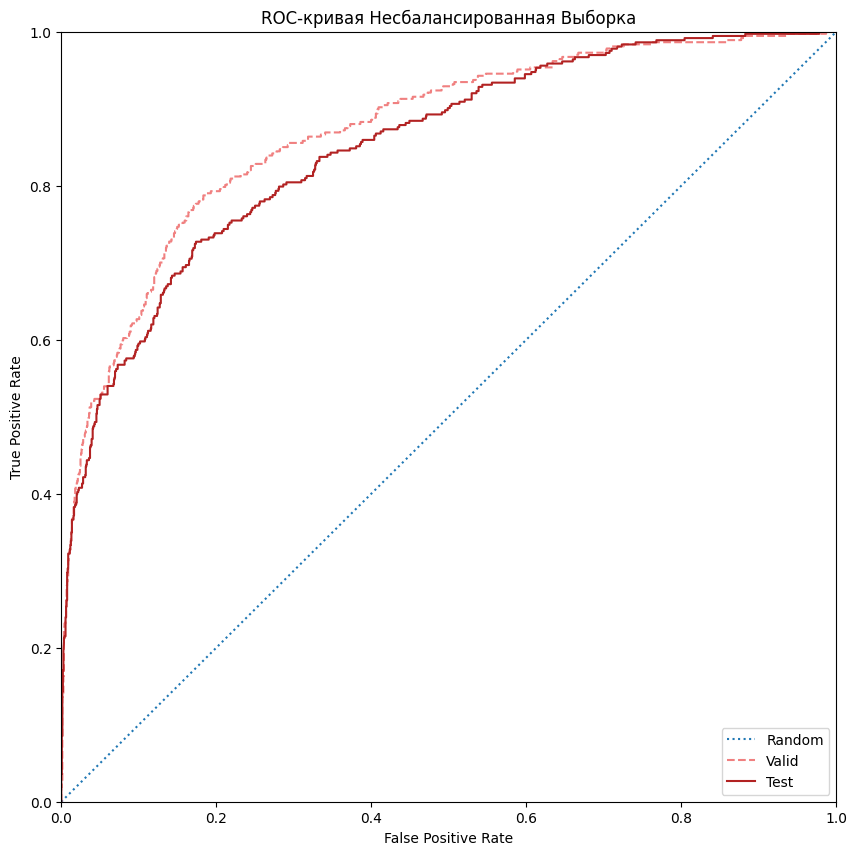

In [47]:
plt.figure(figsize=(10,10))
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.plot([0, 1], [0, 1], linestyle=':')

proba_one_val = best_unbalanced.predict_proba(feat_val)[:, 1]
fpr, tpr, thresholds = roc_curve(targ_val, proba_one_val)
plt.plot(fpr, tpr, linestyle='--', color='lightcoral')

proba_one_test = best_unbalanced.predict_proba(feat_test)[:, 1]
fpr, tpr, thresholds = roc_curve(targ_test, proba_one_test)
plt.plot(fpr, tpr, color='firebrick')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая Несбалансированная Выборка")
plt.legend(['Random', 'Valid', 'Test'], loc='lower right')
plt.show()

**Выводы:**

Правильность лучшей, несбалансированной, модели на тестовой выборке 85.02% (87.09% на проверочной). F1 для тестовой выборки значительн хуже: 56.95% (61.39% проверочная), ROC-AUC немного хуже: 85.02% (87.09% проверочная). Последнее также отражено в графике ROC.

## 3. <a id='toc3_'></a>[Борьба с дисбалансом](#toc0_)

In [48]:
imbalance = targ_train.sum()/(~targ_train).sum()
print("Train balance:", imbalance)

Train balance: 0.25958429561200924


### 3.1. <a id='toc3_1_'></a>[ На основе веса классов](#toc0_)

In [49]:
%%time

model = LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE, solver='liblinear')
model.fit(feat_train, targ_train)
pred_val = model.predict(feat_val)
print("F1 val:", f1_score(targ_val, pred_val))

proba_one_val = model.predict_proba(feat_val)[:, 1]
models_best_val.loc["class_weight='balanced'_LogRegr"] = [
    0,
    0,
    round(f1_score(targ_val, pred_val)*100, 2),
    round(model.score(feat_val, targ_val)*100, 2),
    round(roc_auc_score(targ_val, proba_one_val)*100, 2)
]

F1 val: 0.481994459833795
CPU times: total: 46.9 ms
Wall time: 57.8 ms


In [50]:
%%time

model = RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE)
model.fit(feat_train, targ_train)
pred_val = model.predict(feat_val)
print("F1 val:", f1_score(targ_val, pred_val))

F1 val: 0.5685279187817259
CPU times: total: 734 ms
Wall time: 804 ms


In [51]:
%%time

best_f1 = 0
for branches in range(1,26):
    model = RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced', n_estimators=20, max_depth=branches)
    model.fit(feat_train, targ_train)
    pred_val = model.predict(feat_val)
    f1 = f1_score(targ_val, pred_val)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = branches
        best_model = model
        acc_of_best = model.score(feat_val, targ_val)
    
print("Best F1 depth:", best_depth) 
print("F1 val:", best_f1)
print("Acc val:", acc_of_best) 
    

Best F1 depth: 8
F1 val: 0.6595995288574794
Acc val: 0.841034103410341
CPU times: total: 2.59 s
Wall time: 3.31 s


In [52]:
for trees in range (10, 151, 10):
    model = RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced', n_estimators=trees, max_depth=best_depth)
    model.fit(feat_train, targ_train)
    pred_val = model.predict(feat_val)
    f1 = f1_score(targ_val, pred_val)
    print("Trees:", trees, "F1 val:", f1)
    if f1 >= best_f1:
        best_f1 = f1
        best_trees = trees
        best_model = model

print() 
print("class_weight='balanced'") 
print("Best F1 depth:", best_depth) 
print("Best F1 trees:", best_trees) 
print("F1 val:", best_f1)
acc_of_best = best_model.score(feat_val, targ_val)
print("Acc val:", acc_of_best) 
proba_one_val = best_model.predict_proba(feat_val)[:, 1]
print('ROC-AUC val:', roc_auc_score(targ_val, proba_one_val))      

models_best_val.loc["class_weight='balanced'"] =  [
    best_depth,
    best_trees,
    round(best_f1*100, 2),
    round(acc_of_best*100, 2),
    round(roc_auc_score(targ_val, proba_one_val)*100, 2)
]

Trees: 10 F1 val: 0.6373117033603708
Trees: 20 F1 val: 0.6595995288574794
Trees: 30 F1 val: 0.6611764705882353
Trees: 40 F1 val: 0.6571087216248507
Trees: 50 F1 val: 0.6516052318668252
Trees: 60 F1 val: 0.6531585220500596
Trees: 70 F1 val: 0.6555423122765197
Trees: 80 F1 val: 0.6547192353643967
Trees: 90 F1 val: 0.6507747318235996
Trees: 100 F1 val: 0.6538922155688622
Trees: 110 F1 val: 0.6587395957193817
Trees: 120 F1 val: 0.6595492289442467
Trees: 130 F1 val: 0.6571087216248507
Trees: 140 F1 val: 0.6562874251497006
Trees: 150 F1 val: 0.6563245823389021

class_weight='balanced'
Best F1 depth: 8
Best F1 trees: 30
F1 val: 0.6611764705882353
Acc val: 0.8415841584158416
ROC-AUC val: 0.8819155069227836


**Выводы:**

Для баланса с помощью придания веса, лучший показатель F1 61.84% у Случайного Леса из 140 деревьев глубиной 10.

### 3.2. <a id='toc3_2_'></a>[На основе увеличения выборки](#toc0_)

In [53]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * round(1/repeat))
    target_upsampled = target.loc[features_upsampled.index]
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(feat_train, targ_train, imbalance)
print("New balance:", target_upsampled.sum()/(~target_upsampled).sum())

New balance: 1.038337182448037


In [54]:
%%time

model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
pred_val = model.predict(feat_val)
print("F1 val:", f1_score(targ_val, pred_val))

proba_one_val = model.predict_proba(feat_val)[:, 1]
models_best_val.loc["upsampled_LogRegr"] = [
    0,
    0,
    round(f1_score(targ_val, pred_val)*100, 2),
    round(model.score(features_upsampled, target_upsampled)*100, 2),
    round(roc_auc_score(targ_val, proba_one_val)*100, 2)
    ]

F1 val: 0.4793536804308797
CPU times: total: 62.5 ms
Wall time: 73.6 ms


In [55]:
%%time

model = RandomForestClassifier(random_state=RANDOM_STATE)
model.fit(features_upsampled, target_upsampled)
pred_val = model.predict(feat_val)
print("F1 val:", f1_score(targ_val, pred_val))

F1 val: 0.6262626262626263
CPU times: total: 781 ms
Wall time: 1.04 s


In [56]:
%%time

best_f1 = 0
for branches in range(1,26):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=20, max_depth=branches)
    model.fit(features_upsampled, target_upsampled)
    pred_val = model.predict(feat_val)
    f1 = f1_score(targ_val, pred_val)
    if f1 >= best_f1:
        best_f1 = f1
        best_depth = branches
        best_model = model
        acc_of_best = model.score(feat_val, targ_val)
    
print("Best F1 depth:", best_depth) 
print("F1 val:", best_f1)
print("Acc val:", acc_of_best) 
    

Best F1 depth: 13
F1 val: 0.6387434554973822
Acc val: 0.8481848184818482
CPU times: total: 3.31 s
Wall time: 5.33 s


In [57]:
for trees in range (10, 121, 10):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=trees, max_depth=best_depth)
    model.fit(features_upsampled, target_upsampled)
    pred_val = model.predict(feat_val)
    f1 = f1_score(targ_val, pred_val)
    print("Trees:", trees, "F1 val:", f1)
    if f1 >= best_f1:
        best_f1 = f1
        best_trees = trees
        best_model = model
        
    
print() 
print("upsampled") 
print("Best F1 depth:", best_depth) 
print("Best F1 trees:", best_trees) 
print("F1 val:", best_f1)
acc_of_best = best_model.score(feat_val, targ_val)
print("Acc val:", acc_of_best) 
proba_one_val = best_model.predict_proba(feat_val)[:, 1]
print('ROC-AUC val:', roc_auc_score(targ_val, proba_one_val))

models_best_val.loc["upsampled"] =  [
    best_depth,
    best_trees,
    round(best_f1*100, 2),
    round(acc_of_best*100, 2),
    round(roc_auc_score(targ_val, proba_one_val)*100, 2)
]

Trees: 10 F1 val: 0.6127770534550195
Trees: 20 F1 val: 0.6387434554973822
Trees: 30 F1 val: 0.638961038961039
Trees: 40 F1 val: 0.6350461133069829
Trees: 50 F1 val: 0.6472148541114059
Trees: 60 F1 val: 0.6411609498680739
Trees: 70 F1 val: 0.6464379947229552
Trees: 80 F1 val: 0.6446499339498019
Trees: 90 F1 val: 0.6437994722955145
Trees: 100 F1 val: 0.6393659180977543
Trees: 110 F1 val: 0.6428571428571429
Trees: 120 F1 val: 0.6445623342175066

upsampled
Best F1 depth: 13
Best F1 trees: 50
F1 val: 0.6472148541114059
Acc val: 0.8536853685368537
ROC-AUC val: 0.8790817945718166


**Выводы:**

Для баланса с помощью придания веса, лучший показатель F1 66.19% у Случайного Леса из 120 деревьев глубиной 8.

### 3.3. <a id='toc3_3_'></a>[На основе уменьшения выборки](#toc0_)

In [58]:
def downsample (features, target, part):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=min(part, 1), random_state=RANDOM_STATE), features_ones.sample(frac=min(1/part, 1))]
                              )
    target_downsampled = target.loc[features_downsampled.index]
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(feat_train, targ_train, imbalance)
print("New balance:", target_downsampled.sum()/(~target_downsampled).sum())

New balance: 1.0


In [59]:
%%time

model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
pred_val = model.predict(feat_val)
print("F1 val:", f1_score(targ_val, pred_val))

proba_one_val = model.predict_proba(feat_val)[:, 1]
models_best_val.loc["downsampled_LogRegr"] = [
    0,
    0,
    round(f1_score(targ_val, pred_val)*100, 2),
    round(model.score(features_downsampled, target_downsampled)*100, 2),
    round(roc_auc_score(targ_val, proba_one_val)*100, 2)
]

F1 val: 0.4792626728110599
CPU times: total: 46.9 ms
Wall time: 50.8 ms


In [60]:
%%time

model = RandomForestClassifier(random_state=RANDOM_STATE)
model.fit(features_downsampled, target_downsampled)
pred_val = model.predict(feat_val)
print("F1 val:", f1_score(targ_val, pred_val))

F1 val: 0.6114519427402862
CPU times: total: 281 ms
Wall time: 410 ms


In [61]:
%%time

best_f1 = 0
for branches in range(1,26):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=20, max_depth=branches)
    model.fit(features_downsampled, target_downsampled)
    pred_val = model.predict(feat_val)
    f1 = f1_score(targ_val, pred_val)
    if f1 >= best_f1:
        best_f1 = f1
        best_depth = branches
        best_model = model
        acc_of_best = model.score(feat_val, targ_val)
    
print("Best F1 depth:", best_depth) 
print("F1 val:", best_f1)
print("Acc val:", acc_of_best) 
    

Best F1 depth: 5
F1 val: 0.6192017259978425
Acc val: 0.8058305830583058
CPU times: total: 1.5 s
Wall time: 2.19 s


In [62]:
for trees in range (10, 131, 10):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=trees, max_depth=best_depth)
    model.fit(features_downsampled, target_downsampled)
    pred_val = model.predict(feat_val)
    f1 = f1_score(targ_val, pred_val)
    print("Trees:", trees, "F1 val:", f1)
    if f1 >= best_f1:
        best_f1 = f1
        best_trees = trees
        best_model = model
        acc_of_best = model.score(feat_val, targ_val)
            
print() 
print("downsampled") 
print("Best F1 depth:", best_depth) 
print("Best F1 trees:", best_trees) 
print("F1 val:", best_f1)
acc_of_best = best_model.score(feat_val, targ_val)
print("Acc val:", acc_of_best) 
proba_one_val = best_model.predict_proba(feat_val)[:, 1]
print('ROC-AUC val:', roc_auc_score(targ_val, proba_one_val))

models_best_val.loc["downsampled"] = [
    best_depth,
    best_trees,
    round(best_f1*100, 2),
    round(acc_of_best*100, 2),
    round(roc_auc_score(targ_val, proba_one_val)*100, 2)
]

Trees: 10 F1 val: 0.6203090507726269
Trees: 20 F1 val: 0.6192017259978425
Trees: 30 F1 val: 0.6234042553191489
Trees: 40 F1 val: 0.6185344827586207
Trees: 50 F1 val: 0.6236559139784946
Trees: 60 F1 val: 0.6247288503253796
Trees: 70 F1 val: 0.6252676659528907
Trees: 80 F1 val: 0.6245989304812835
Trees: 90 F1 val: 0.6232657417289221
Trees: 100 F1 val: 0.6184909670563231
Trees: 110 F1 val: 0.6214209968186638
Trees: 120 F1 val: 0.6193001060445387
Trees: 130 F1 val: 0.6219382321618744

downsampled
Best F1 depth: 5
Best F1 trees: 70
F1 val: 0.6252676659528907
Acc val: 0.8074807480748075
ROC-AUC val: 0.8787080975818613


### 3.4. <a id='toc3_4_'></a>[Выбор лучшей и выводы и выводы](#toc0_)

In [63]:
models_best_val

,depth,trees,"F1, %","Acc, %","ROC-AUC, %"
balance,,,,,
unbalanced,13.0,30.0,61.39,87.13,87.09
class_weight='balanced'_LogRegr,0.0,0.0,48.20,69.14,77.15
class_weight='balanced',8.0,30.0,66.12,84.16,88.19
upsampled_LogRegr,0.0,0.0,47.94,69.82,77.18
upsampled,13.0,50.0,64.72,85.37,87.91
downsampled_LogRegr,0.0,0.0,47.93,69.08,77.14
downsampled,5.0,70.0,62.53,80.75,87.87


**Выводы:**

Сравнивая результаты разных спосообов балансиврования и несбалансированную модель на проверочной выборке мы видим что лучшие результаты у модели построенной на основе балансировки веса и увеличения выборки. Главным различием между ними является количество деревьев, в качесиве лучшей выберем ту которая использует 120 деревьев, скорее всего у нее будут более надёжные результаты на тестовых и неизвестных данных.

Модель построенная на отбрасывании объектов скорее всего отстаёт, потому что теряется, вместе с данными, часть закономерностей влияющих на значения целевого признака.

По сравнению с несбалансированным распределением классов модели с учётом баланса показывают значительно лучший уровень F1, сравимые показатели ROC-AUC, и некоторую потерю правильности, особенно модель построенная на отбрасывании объектов.

## 4. <a id='toc4_'></a>[Тестирование модели](#toc0_)

In [64]:
%%time

best_depth = int(models_best_val.loc["class_weight='balanced'", 'depth'])
best_trees = int(models_best_val.loc["class_weight='balanced'", 'trees'])

best_balanced = RandomForestClassifier(random_state=RANDOM_STATE,
                                       class_weight='balanced', n_estimators=best_trees, max_depth=best_depth)
best_balanced.fit(feat_train, targ_train)

print("Acc test:", best_balanced.score(feat_test, targ_test))

pred_test = best_balanced.predict(feat_test)
print("F1 test:", f1_score(targ_test, pred_test))

proba_one_test = best_balanced.predict_proba(feat_test)[:, 1]
print('ROC-AUC test:', roc_auc_score(targ_test, proba_one_test))

models_best_test.loc["class_weight='balanced'"] = [
    best_depth,
    best_trees,
    round(f1_score(targ_test, pred_test)*100, 2),
    round(best_balanced.score(feat_test, targ_test)*100, 2),
    round(roc_auc_score(targ_val, proba_one_val)*100, 2)
]

Acc test: 0.8191313908741067
F1 test: 0.5992691839220463
ROC-AUC test: 0.8556027306027305
CPU times: total: 188 ms
Wall time: 205 ms


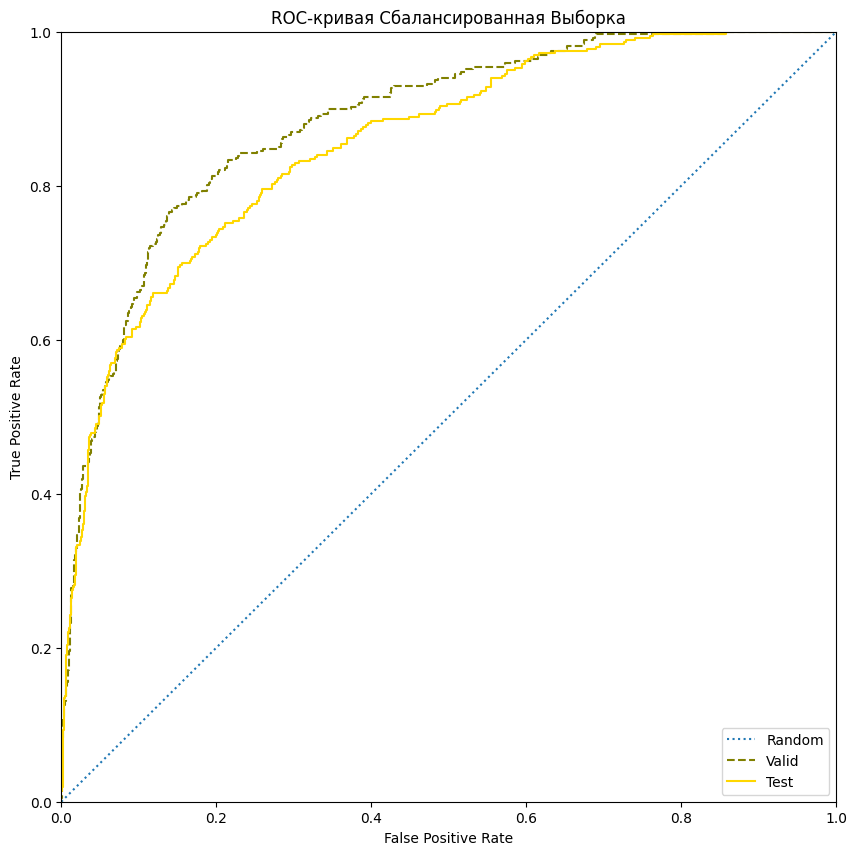

In [65]:
plt.figure(figsize=(10,10))
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.plot([0, 1], [0, 1], linestyle=':')

proba_one_val = best_balanced.predict_proba(feat_val)[:, 1]
fpr, tpr, thresholds = roc_curve(targ_val, proba_one_val)
plt.plot(fpr, tpr, linestyle='--', color='olive')

proba_one_test = best_balanced.predict_proba(feat_test)[:, 1]
fpr, tpr, thresholds = roc_curve(targ_test, proba_one_test)
plt.plot(fpr, tpr, color='gold')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая Сбалансированная Выборка")
plt.legend(['Random', 'Valid', 'Test'], loc='lower right')
plt.show()

**Выводы:**

Правильность лучшей, сбалансированной, модели на тестовой выборке 83.23% (84.38% на проверочной). Как и для несбалансированной модали результаты F1 и ROC-AUC для тестовой выборки чуть хуже: F1 62.02% (66.19% проверочная), ROC-AUC 87.87% (88.60% проверочная). Последнее также отражено в графике ROC.

## 5. <a id='toc5_'></a>[Оценка разницы моделей с учётом баланса, и без](#toc0_)

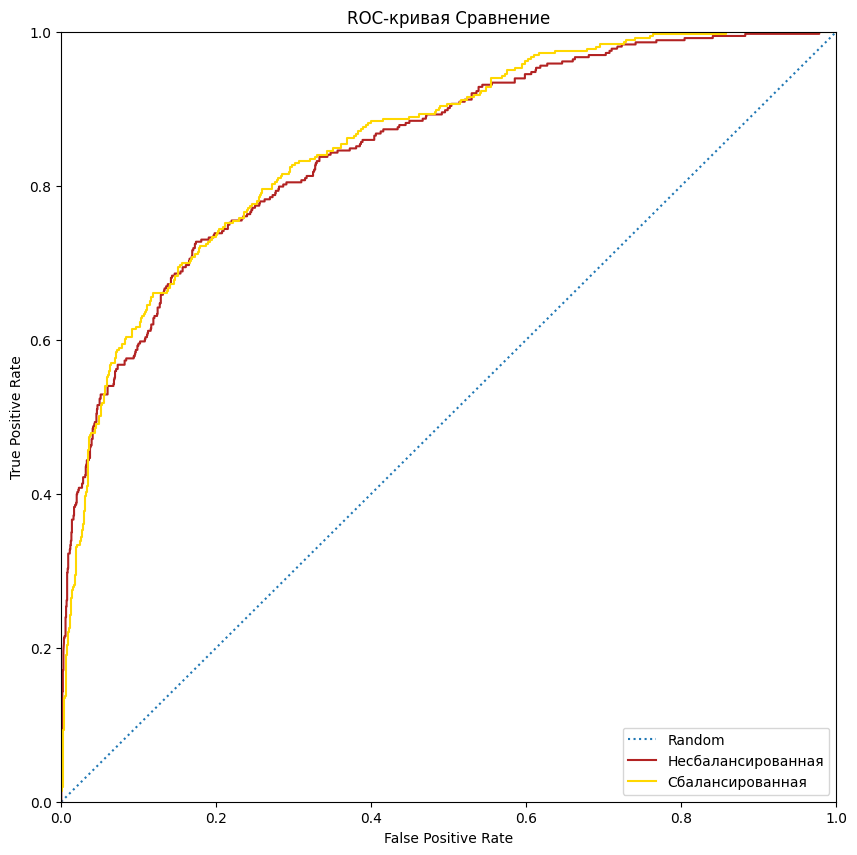

In [66]:
fig = plt.figure(figsize=(10,10))
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.plot([0, 1], [0, 1], linestyle=':')

proba_one_test = best_unbalanced.predict_proba(feat_test)[:, 1]
fpr, tpr, thresholds = roc_curve(targ_test, proba_one_test)
plt.plot(fpr, tpr, color='firebrick')


proba_one_test = best_balanced.predict_proba(feat_test)[:, 1]
fpr, tpr, thresholds = roc_curve(targ_test, proba_one_test)
plt.plot(fpr, tpr, color='gold')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая Сравнение")
plt.legend(['Random', 'Несбалансированная', 'Сбалансированная'], loc='lower right')
plt.show()


In [67]:
models_best_test

,depth,trees,"F1, %","Acc, %","ROC-AUC, %"
unbalanced,,,,,
unbalanced,13.0,30.0,56.95,86.20,85.02
class_weight='balanced',8.0,30.0,59.93,81.91,87.87


**Выводы:**

Нам удалось улучшить показатель F1 на 5% по сравнению с несбалансированной моделью. Также (~3%) вырос показатель ROC-AUC. Примечательно что Правильность модели при этом немного упала.

На графике можно увидеть, что сбалансированная модель лучше справляется со средними показателями порога классификации.

## 6. <a id='toc6_'></a>[Общий вывод](#toc0_)

Произведенная работа позволяет увидеть преимущества балансирования классов целевого признака при построении моделей машинного обучения. Особо примечательно, что уменьшение выборки может привести к потере данных, что негативно сказывается на качестве результатов, возможно оно более уместно в рамках обработки данных близким к сбалансированным. Лучшие показатели в целом у метода использования балансирования веса классов, однако учитывая близость результатов к методу увеличения выборки, сложно однозначно заявлять о таком преимуществе, возможно имеет место быть особенность данных. Однако изменение веса позволяет наименьшим образом искажать имеющиеся данные, что примечательно.

В качестве рекомендаций заказчику, на основе ИАД, рекомендую более детально изучить причины высокого уровня ухода клиентов из Германии, а также клиентов среднего возраста. 

Особое внимание рекомендую обратить на клиентов пользующихся несколькими продуктами  банка, большинство из них покидает банк.